In [ ]:
import timm
import torch
from  torch import nn
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
m = timm.create_model('resnet50d', pretrained=False, in_chans = 1)
x =torch.randn(1, 1, 224, 224)
m(x).shape

torch.Size([1, 1000])

In [ ]:
m.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [ ]:
m.get_classifier()

Linear(in_features=2048, out_features=1000, bias=True)

In [ ]:
timm.create_model('resnet50d', pretrained=False, num_classes=10).get_classifier()

Linear(in_features=2048, out_features=10, bias=True)

In [ ]:
timm.create_model('resnet50d', pretrained=False, num_classes=0).get_classifier()

Identity()

In [ ]:
m.global_pool

SelectAdaptivePool2d (pool_type=avg, flatten=Flatten(start_dim=1, end_dim=-1))

In [ ]:
pool_types = ['avg', 'max', 'avgmax', 'catavgmax', '']

for pool in pool_types:
    model = timm.create_model('resnet50d', pretrained=True, num_classes=0, global_pool=pool)
    model.eval()
    feature_output = model(torch.rand(1, 3, 224, 224))
    print(feature_output.shape)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth" to C:\Users\zc199/.cache\torch\hub\checkpoints\resnet50d_ra2-464e36ba.pth


torch.Size([1, 2048])
torch.Size([1, 2048])
torch.Size([1, 2048])
torch.Size([1, 4096])
torch.Size([1, 2048, 7, 7])


In [ ]:
m = timm.create_model('resnet50d', pretrained=True)
print('Original pooling: {}'.format(m.global_pool))
print('Original classifier: {}'.format(m.get_classifier()))
print('----------------')

m.reset_classifier(10, 'max')
print('Original pooling: {}'.format(m.global_pool))
print('Original classifier: {}'.format(m.get_classifier()))

Original pooling: SelectAdaptivePool2d (pool_type=avg, flatten=Flatten(start_dim=1, end_dim=-1))
Original classifier: Linear(in_features=2048, out_features=1000, bias=True)
----------------
Original pooling: SelectAdaptivePool2d (pool_type=max, flatten=Flatten(start_dim=1, end_dim=-1))
Original classifier: Linear(in_features=2048, out_features=10, bias=True)


In [ ]:
model = timm.create_model('resnet50d', pretrained=True, num_classes=10, global_pool='catavgmax')
num_in_features = model.get_classifier().in_features; num_in_features

4096

In [ ]:
model.fc = nn.Sequential(
    nn.BatchNorm1d(num_in_features),
    nn.Linear(in_features=num_in_features, out_features=512, bias=True),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(0.4),
    nn.Linear(in_features=512, out_features=10, bias=False)   
)

In [ ]:
model.eval()
model(torch.randn(1, 3, 224, 224)).shape



torch.Size([1, 10])

# Feature Extraction

In [ ]:
pets_image_paths = glob.glob('D:/Data/Oxford-IIIT/images/*')

In [ ]:
image = Image.open(pets_image_paths[0])

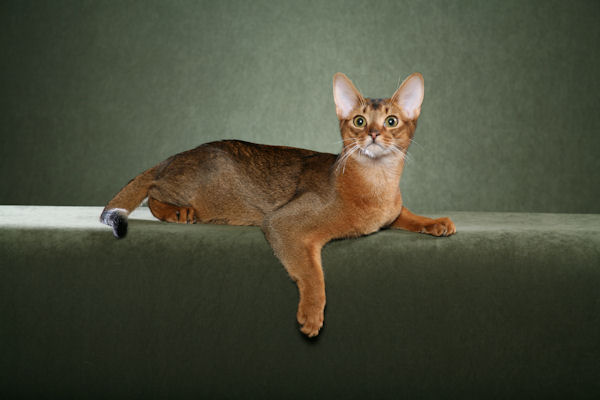

In [ ]:
image

In [ ]:
image = torch.as_tensor(np.array(image, dtype=np.float32)).transpose(2,0)[None]; image.shape

torch.Size([1, 3, 600, 400])

In [ ]:
model = timm.create_model('resnet50d', pretrained=True)
model.default_cfg

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth',
 'num_classes': 1000,
 'input_size': (3, 224, 224),
 'pool_size': (7, 7),
 'crop_pct': 0.875,
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'first_conv': 'conv1.0',
 'classifier': 'fc',
 'architecture': 'resnet50d'}

In [ ]:
# final feature map
feature_output = model.forward_features(image); feature_output.shape

torch.Size([1, 2048, 19, 13])

In [ ]:
def visualise_feature_output(t):
    plt.imshow(t[0].transpose(0,2).sum(-1).detach().numpy())
    plt.show()

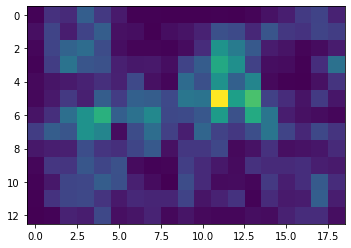

In [ ]:
visualise_feature_output(feature_output)

In [ ]:
model = timm.create_model('resnet50d', pretrained=True, features_only=True)

In [ ]:
model.feature_info.module_name()

['act1', 'layer1', 'layer2', 'layer3', 'layer4']

In [ ]:
model.feature_info.channels()

[64, 256, 512, 1024, 2048]

In [ ]:
out = model(image)
for o in out:
    print(o.shape)

torch.Size([1, 64, 300, 200])
torch.Size([1, 256, 150, 100])
torch.Size([1, 512, 75, 50])
torch.Size([1, 1024, 38, 25])
torch.Size([1, 2048, 19, 13])


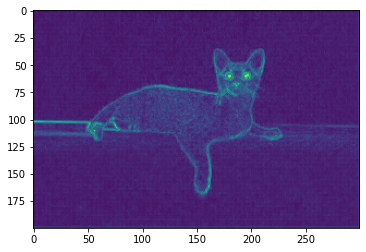

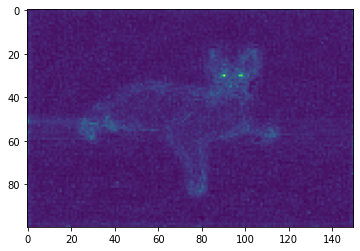

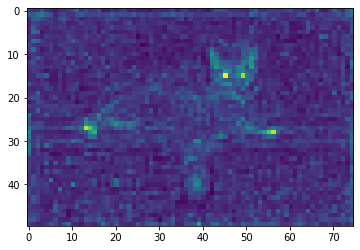

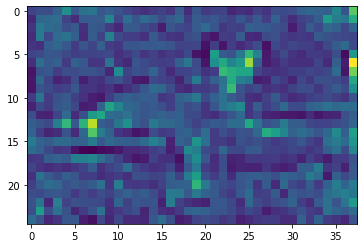

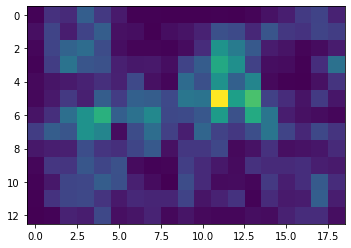

In [ ]:
for o in out:
    plt.imshow(o[0].transpose(0, 2).sum(-1).detach().numpy())
    plt.show()

# TorchVision

In [ ]:
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor

In [ ]:
model = timm.create_model('resnet50d', pretrained=True, exportable=True)

In [ ]:
nodes, _ =get_graph_node_names(model)

In [ ]:
nodes

['x',
 'conv1.0',
 'conv1.1',
 'conv1.2',
 'conv1.3',
 'conv1.4',
 'conv1.5',
 'conv1.6',
 'bn1',
 'act1',
 'maxpool',
 'layer1.0.conv1',
 'layer1.0.bn1',
 'layer1.0.act1',
 'layer1.0.conv2',
 'layer1.0.bn2',
 'layer1.0.act2',
 'layer1.0.conv3',
 'layer1.0.bn3',
 'layer1.0.downsample.0',
 'layer1.0.downsample.1',
 'layer1.0.downsample.2',
 'layer1.0.add',
 'layer1.0.act3',
 'layer1.1.conv1',
 'layer1.1.bn1',
 'layer1.1.act1',
 'layer1.1.conv2',
 'layer1.1.bn2',
 'layer1.1.act2',
 'layer1.1.conv3',
 'layer1.1.bn3',
 'layer1.1.add',
 'layer1.1.act3',
 'layer1.2.conv1',
 'layer1.2.bn1',
 'layer1.2.act1',
 'layer1.2.conv2',
 'layer1.2.bn2',
 'layer1.2.act2',
 'layer1.2.conv3',
 'layer1.2.bn3',
 'layer1.2.add',
 'layer1.2.act3',
 'layer2.0.conv1',
 'layer2.0.bn1',
 'layer2.0.act1',
 'layer2.0.conv2',
 'layer2.0.bn2',
 'layer2.0.act2',
 'layer2.0.conv3',
 'layer2.0.bn3',
 'layer2.0.downsample.0',
 'layer2.0.downsample.1',
 'layer2.0.downsample.2',
 'layer2.0.add',
 'layer2.0.act3',
 'layer2.

In [ ]:
features = {'layer1.0.act2': 'out'}
feature_extractor = create_feature_extractor(model, return_nodes=features)

In [ ]:
out = feature_extractor(image)

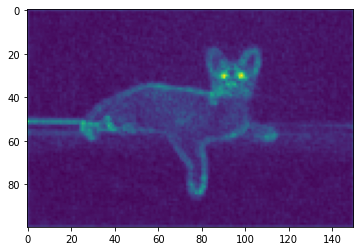

In [ ]:
visualise_feature_output(out['out'])

In [ ]:
model = timm.create_model('resnet50d', pretrained=True, scriptable=True)
model.eval()

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Co

In [ ]:
scripted_model = torch.jit.script(model)

In [ ]:
scripted_model(torch.randn(8,3,224,224)).shape

torch.Size([8, 1000])

# Data

In [ ]:
folder = "D:\Data\COVID_QU\Infection Segmentation Data\Infection Segmentation Data\Train"

In [ ]:
root_l = []
subdirs_l = []
files_l = []
for root, subdirs, files in os.walk(folder, topdown=False):
    root_l.append(root)
    subdirs_l.append(subdirs)
    files_l.append(files)

In [ ]:
root_l

['D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\COVID-19\\images',
 'D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\COVID-19\\infection masks',
 'D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\COVID-19\\lung masks',
 'D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\COVID-19',
 'D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\Non-COVID\\images',
 'D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\Non-COVID\\infection masks',
 'D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\Non-COVID\\lung masks',
 'D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\Non-COVID',
 'D:\\Data\\COVID_QU\\Infection Segmentation Data\\Infection Segmentation Data\\Train\\Normal\\images',
 'D:\\Data\\COVID_QU\\Infection Se

In [ ]:
rel_path = os.path.relpath(root_l[3], folder)
rel_path_split = rel_path.split(os.path.sep)

In [ ]:
IMG_EXTENSIONS = ['.png', '.jpg', '.jpeg']
def load_images_and_masks(folder, types=IMG_EXTENSIONS, class_to_idx=None, sort=True):
    labels = []
    image_names = []
    lung_mask_names = []
    infection_mask_names = []
    
    for root, subdirs, files in os.walk(folder, topdown=False):
        rel_path = os.path.relpath(root, folder) if (root != folder) else ''
        rel_path_split = rel_path.split(os.path.sep)
        if len(rel_path_split) == 2:
            label = rel_path_split[-2]
            for f in files:
                base, ext = os.path.splitext(f)
                if ext.lower() in types:
                    if rel_path_split[-1] == 'images':
                        image_names.append(os.path  .join(root, f))
                        labels.append(label)
                    
    if class_to_idx is None:
        # building class index
        unique_labels = set(labels)
        sorted_labels = list(sorted(unique_labels, key=natural_key))
        class_to_idx = {c: idx for idx, c in enumerate(sorted_labels)}
    images_and_targets = [(f, class_to_idx[l]) for f, l in zip(image_names, labels) if l in class_to_idx]
    if sort:
        images_and_targets = sorted(images_and_targets, key=lambda k: natural_key(k[0]))
    return images_and_targets, class_to_idx
                

In [ ]:
import re
def natural_key(string_):
    """See http://www.codinghorror.com/blog/archives/001018.html"""
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_.lower())]

In [ ]:
a, b = load_images_and_masks("D:\Data\COVID_QU\Lung Segmentation Data\Lung Segmentation Data\Train")

In [ ]:
len(a)

21715

In [ ]:
a = 'L'
image = Image.open(pets_image_paths[0]).convert(a)

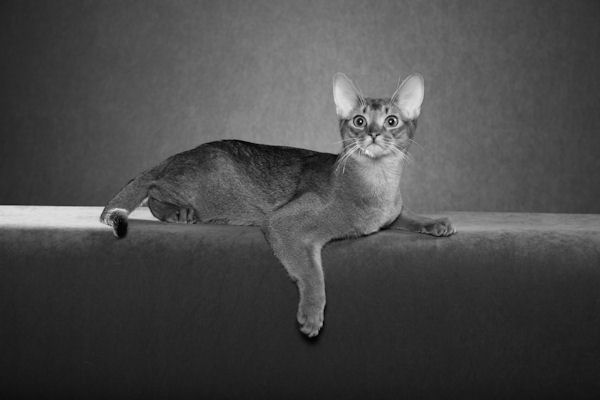

In [ ]:
image

In [ ]:
np.array(image).shape

(400, 600)

In [ ]:
from itertools import repeat

def expand_to_chs(x, n):
    if not isinstance(x, (tuple, list)):
        x = tuple(repeat(x, n))
    elif len(x) == 1:
        x = x * n
    else:
        assert len(x) == n, 'normalization stats must match image channels'
    return x


In [ ]:
IMAGENET_DEFAULT_MEAN = (0.485, 0.456, 0.406)
IMAGENET_DEFAULT_STD = (0.229, 0.224, 0.225)
mean = IMAGENET_DEFAULT_MEAN

In [5]:
!pip install timm

     |████████████████████████████████| 431 kB 5.3 MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/tokenlabeling_covid')


In [3]:
from utils import get_mean_and_std

In [6]:
from data import CovidQu

In [12]:
root = '/content/drive/MyDrive/covid_attention/COVID_QU/Lung Segmentation Data/Lung Segmentation Data/Train'

In [15]:
import torchvision

In [16]:
from torch.torch_version import TorchVersion
dataset = CovidQu(root, greyscale=True, transform=torchvision.transforms.ToTensor())

In [18]:
len(dataset)

21715

In [21]:
import torch
def get_mean_and_std(dataset):
    '''Compute the mean and std value of dataset.'''
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)
    mean = torch.zeros(1)
    std = torch.zeros(1)
    print('==> Computing mean and std..')
    for inputs, targets in dataloader:
        for i in range(1):
            mean[i] += inputs[:,i,:,:].mean()
            std[i] += inputs[:,i,:,:].std()
    mean.div_(len(dataset))
    std.div_(len(dataset))
    return mean, std

In [22]:
get_mean_and_std(dataset)

==> Computing mean and std..


(tensor([0.5128]), tensor([0.2236]))

In [1]:
import glob
import timm
import matplotlib.pyplot as plt
from PIL import Image

In [2]:

image_paths = glob.glob('/mnt/d/Data/COVID_QU/Infection_Segmentation_Data/Infection_Segmentation_Data/Train/Covid-19/images/*')
mask_paths = glob.glob('/mnt/d/Data/COVID_QU/Infection_Segmentation_Data/Infection_Segmentation_Data/Train/Covid-19/lung masks/*')

In [3]:
from data.mask_transforms_factory import create_mask_transform


In [4]:
import matplotlib.pyplot as plt
image = Image.open(image_paths[0]).convert('L')
mask = Image.open(mask_paths[0]).convert('L')

In [5]:
import numpy as np
np.array(mask).shape

(256, 256)

In [6]:
from data.mask_augment import rand_augment_transform
tfm1 = rand_augment_transform(
    config_str='rand-m9-n3-mstd0.5',
    hparams={'img_mean': 124}
)

In [7]:
tfm = create_mask_transform(
    input_size=224,
    is_training=False,
    auto_augment='rand-m3-n3-mstd0.5',
    use_prefetcher=False,
    toimg=True,
    vflip=0,
    hflip=0,
    mean=[0.5128],
    std=[0.2236]
)

In [29]:
from data.dataset import create_dataset
data_dir = '/mnt/d/Data/COVID_QU/Infection_Segmentation_Data/Infection_Segmentation_Data'
dataset_train = create_dataset(data_dir, dataset_type='Train', greyscale=True, mask_type='lung masks', patch_size=(16,16))
dataset_val = create_dataset(data_dir, dataset_type='Val', greyscale=True, mask_type=None, patch_size=(16,16))

In [21]:
from data.loader import create_loader
loader_train = create_loader(
    dataset_train,
    input_size=224,
    batch_size=8,
    is_training=False,
    use_prefetcher=False,
    auto_augment='rand-m3-n3-mstd0.5',
    mean=[0.5128],
    std=[0.2236],
    use_mask=False
)
loader_train = create_loader(
    dataset_val,
    input_size=224,
    batch_size=8,
    is_training=False,
    use_prefetcher=False,
    auto_augment='rand-m3-n3-mstd0.5',
    mean=[0.5128],
    std=[0.2236],
    use_mask=False
)

In [22]:
ds_iter = iter(loader_train)

In [28]:
# dataset_train.__getitem__(0)

In [14]:
img, target, score = next(ds_iter)

In [18]:
score.shape

torch.Size([8, 196])

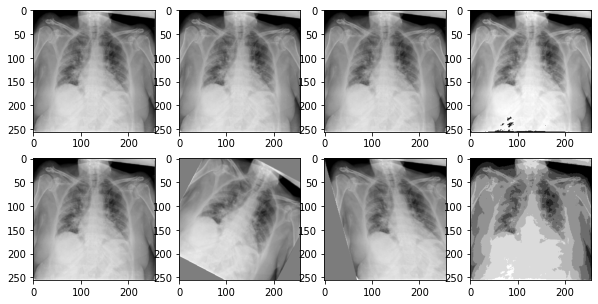

In [41]:
fig, ax  = plt.subplots(2, 4, figsize=(10,5))
for idx, im in enumerate(tfm(image) for i in range(4)):
    ax[0, idx].imshow(im, cmap='gray')
for idx, im in enumerate(tfm(image) for i in range(4)):
    ax[1, idx].imshow(im, cmap='gray')

In [88]:
path = glob.glob('/mnt/d/Data/label_top5_train_nfnet/n01440764/*')

In [89]:
import torch
score_maps = torch.load(path[2]).float()

In [69]:
score_maps.shape

torch.Size([2, 5, 18, 18])

In [66]:
target = score_maps

In [67]:
len(target.size())

4

In [68]:
target.size(1)

5

In [92]:
target = torch.stack([torch.load(path[i]).float() for i in range(8)])

In [76]:
target[:,2,0,0,:4]

IndexError: too many indices for tensor of dimension 4

In [82]:
target[-1,0,0,5]=5

In [83]:
target.shape

torch.Size([2, 5, 18, 18])

In [85]:
def mixup_target(target, num_classes, lam=1., smoothing=0.0, device='cuda', label_size=1):
    '''
    generate and mix target from the given label maps
    target: label maps/ label maps with coords 
    num_classes: number of classes for the target
    lam: lambda for mixup target
    ''' 
    off_value = smoothing / num_classes
    on_value = 1. - smoothing + off_value
    if len(target.size())>2:
        if target.size(1)==3:
            y1 = get_labelmaps_with_coords(target, num_classes, on_value=on_value, off_value=off_value, device=device, label_size=label_size)
            y2 = y1.flip(0)
            # y2 = get_labelmaps_with_coords(target.flip(0), num_classes, on_value=on_value, off_value=off_value, device=device, label_size=label_size)
        else:
            raise ValueError("Not supported label type")
    else:
        y1 = one_hot(target, num_classes, on_value=on_value, off_value=off_value, device=device)
        y2 = one_hot(target.flip(0), num_classes, on_value=on_value, off_value=off_value, device=device)

    return y1 * lam + y2 * (1. - lam)

In [87]:
mixup_target(target, 1000)

ValueError: Not supported label type

In [90]:
def get_labelmaps(label_maps_topk, num_batches):
    label_maps_topk_sizes = label_maps_topk[0].size()

    label_maps = torch.zeros([num_batches, 1000, label_maps_topk_sizes[2],
                              label_maps_topk_sizes[3]])
    for _label_map, _label_topk in zip(label_maps, label_maps_topk):
        _label_map = _label_map.scatter_(
            0,
            _label_topk[1][:, :, :].long(),
            _label_topk[0][:, :, :]
        )
    label_maps = label_maps.cuda()
    return label_maps

In [96]:
get_labelmaps(target, 8)[0][0].shape

torch.Size([18, 18])

In [97]:
token = 'Hello, world'


In [98]:
token.replace('Hello', 'hello')

'hello, world'

In [3]:
import glob
from PIL import Image
lung_mask_path = glob.glob('/mnt/d/Data/COVID_QU/Infection_Segmentation_Data/Infection_Segmentation_Data/Train/COVID-19/lung masks/*')
lung_mask = Image.open(lung_mask_path[0]).convert('L')

In [4]:
import numpy as np
mask_np = np.array(lung_mask)

In [5]:
mask_np.shape

(256, 256)

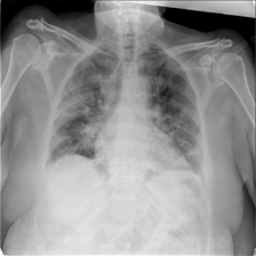

In [6]:
image_path = glob.glob('/mnt/d/Data/COVID_QU/Infection_Segmentation_Data/Infection_Segmentation_Data/Train/COVID-19/images/*')
image = Image.open(image_path[0]).convert('L')
image

In [7]:
np.array(image).shape

(256, 256)

In [20]:
import math
def rotate_label(mask, degrees):
    _, w, h = mask.shape
    post_trans = (0, 0)
    rotn_center = (w / 2.0, h / 2.0)
    angle = math.radians(degrees)
    matrix = [
        round(math.cos(angle), 15),
        round(math.sin(angle), 15),
        0.0,
        round(-math.sin(angle), 15),
        round(math.cos(angle), 15),
        0.0,
    ]

    def transform(x, y, matrix):
        (a, b, c, d, e, f) = matrix
        return a * x + b * y + c, d * x + e * y + f

    matrix[2], matrix[5] = transform(
        -rotn_center[0] - post_trans[0], -rotn_center[1] - post_trans[1], matrix
    )
    matrix[2] += rotn_center[0]
    matrix[5] += rotn_center[1]
    return affine_label(mask, matrix)

In [10]:
w, h = mask_np.shape
post_trans = (0, 0)
rotn_center = (w / 2.0, h / 2.0)
angle = math.radians(15)
matrix = [
    round(math.cos(angle), 15),
    round(math.sin(angle), 15),
    0.0,
    round(-math.sin(angle), 15),
    round(math.cos(angle), 15),
    0.0,
]

In [12]:
from scipy import ndimage
def affine_label(label, matrix):
    
    # label: 2, k, H, W
    # label[0] value, label[1] index
    a,b,c,d,e,f = matrix
    affine_matrix = [[1,0,0,0],[0,a,b,c],[0,d,e,f]]
    value = ndimage.affine_transform(label[0],matrix=affine_matrix, order=0, mode="constant")

    return torch.from_numpy(value)

In [21]:
rotate_label(np.expand_dims(mask_np,0), 15)

RuntimeError: affine matrix has wrong number of rows

In [18]:
np.expand_dims(mask_np,0).shape

(1, 256, 256)

In [19]:
import glob

path = glob.glob('/Users/chenzhou/Desktop/COVID/*')

In [20]:
from PIL import Image
image = Image.open(path[0]).convert('L')

In [3]:
image.size

(233, 145)

In [4]:
import math
w, h = image.size
post_trans = (0, 0)
rotn_center = (w / 2.0, h / 2.0)
angle = -math.radians(15)
matrix = [
    round(math.cos(angle), 15),
    round(math.sin(angle), 15),
    0.0,
    round(-math.sin(angle), 15),
    round(math.cos(angle), 15),
    0.0,
]

In [5]:
def transform(x, y, matrix):
    (a, b, c, d, e, f) = matrix
    return a * x + b * y + c, d * x + e * y + f

In [6]:
matrix[2], matrix[5] = transform(
    -rotn_center[0] - post_trans[0], -rotn_center[1] - post_trans[1], matrix
)
matrix[2] += rotn_center[0]
matrix[5] += rotn_center[1]

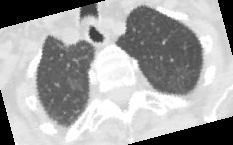

In [7]:
image.transform(image.size, Image.AFFINE, matrix)

In [9]:
import numpy as np
np.array(image)

array([[214, 216, 220, ..., 223, 226, 225],
       [224, 225, 226, ..., 226, 231, 230],
       [229, 231, 231, ..., 227, 226, 226],
       ...,
       [211, 215, 219, ..., 206, 206, 207],
       [207, 209, 212, ..., 205, 206, 206],
       [208, 207, 208, ..., 205, 205, 206]], dtype=uint8)

In [13]:
import torchvision
import torch
from torchvision import transforms

In [44]:
transform = transforms.Compose(
    [transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)]
)

In [72]:
img_t =transform(image)

In [73]:
img_t.size()

torch.Size([1, 224, 224])

In [59]:
from torch import nn
filter = nn.Conv2d(in_channels=1, out_channels=256, kernel_size=(16,16), stride=(16, 16))
patch = filter(img_t)[0]

In [75]:
img_arr = np.array(img_t)[0]; img_arr.shape
# img_arr.reshape()

(224, 224)

In [80]:
img_arr.reshape(14,16,14,16,1).swapaxes(1,2).shape

(14, 14, 16, 16, 1)

In [56]:
patch[0].sum(0)

tensor([-4.0829, -4.2383, -3.0904, -1.4102, -2.1138, -2.9281, -3.5662, -3.2619,
        -4.7642, -2.7638, -1.4553, -1.8144, -1.8278, -2.6962, -4.3194, -3.7568],
       grad_fn=<SumBackward1>)

In [81]:
class ToNumpy:

    def __call__(self, pil_img):
        np_img = np.array(pil_img, dtype=np.uint8)
        if np_img.ndim < 3:
            np_img = np.expand_dims(np_img, axis=-1)
        np_img = np.rollaxis(np_img, 2)  # HWC to CHW
        return np_img

image

In [84]:
img_arr = ToNumpy()(image)

In [86]:
img_arr.shape

(1, 145, 233)

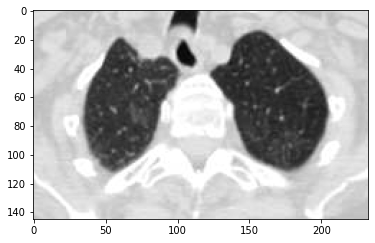

In [91]:
plt.imshow(img_arr[0], cmap='gray')

In [95]:
img_t.numpy()

array([[[0.6784314 , 0.69411767, 0.7254902 , ..., 0.7490196 ,
         0.77254903, 0.7647059 ],
        [0.7176471 , 0.7254902 , 0.7490196 , ..., 0.75686276,
         0.7882353 , 0.78039217],
        [0.7647059 , 0.77254903, 0.78039217, ..., 0.77254903,
         0.8039216 , 0.8039216 ],
        ...,
        [0.62352943, 0.64705884, 0.6784314 , ..., 0.60784316,
         0.6156863 , 0.6156863 ],
        [0.6313726 , 0.6313726 , 0.64705884, ..., 0.60784316,
         0.60784316, 0.6156863 ],
        [0.6313726 , 0.62352943, 0.6313726 , ..., 0.60784316,
         0.60784316, 0.6156863 ]]], dtype=float32)

In [96]:
import cv2
import numpy as np

img = cv2.imread(path[0])
res = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

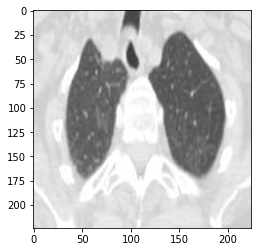

In [98]:
plt.imshow(res)

In [99]:
res.shape

(224, 224, 3)

In [102]:
patch = res.reshape(14,16,14,16,3).swapaxes(1,2)

In [103]:
patch.shape

(14, 14, 16, 16, 3)

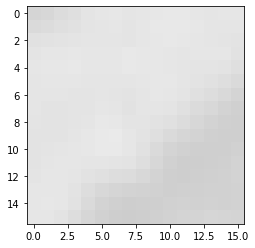

In [104]:
plt.imshow(patch[0][0])

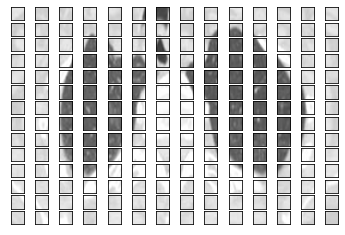

In [109]:
fig, ax = plt.subplots(14,14)
for i in range(14):
    for j in range(14):
        ax[i][j].imshow(patch[i][j])
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])


In [144]:
patch.sum(axis=-1).shape

(14, 14, 16, 16)

In [113]:
isinstance(image, Image.Image)

True

In [124]:
image.size[-2]

(233,)

In [125]:
image.size

(233, 145)

In [157]:
patch.reshape(-1, *patch.shape[:-3]) == patch.reshape(*patch.shape[:-3], -1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [162]:
patch.reshape(*patch.shape[:-3], -1) == patch.reshape(*patch.shape[:-3], -1)

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [158]:
patch.reshape(*patch.shape[:-3], -1)

array([[[213, 213, 213, ..., 212, 212, 212],
        [230, 230, 230, ..., 214, 214, 214],
        [209, 209, 209, ..., 210, 210, 210],
        ...,
        [205, 205, 205, ..., 228, 228, 228],
        [206, 206, 206, ..., 228, 228, 228],
        [227, 227, 227, ..., 217, 217, 217]],

       [[227, 227, 227, ..., 223, 223, 223],
        [210, 210, 210, ..., 223, 223, 223],
        [212, 212, 212, ..., 211, 211, 211],
        ...,
        [227, 227, 227, ..., 215, 215, 215],
        [229, 229, 229, ..., 218, 218, 218],
        [230, 230, 230, ..., 215, 215, 215]],

       [[209, 209, 209, ..., 229, 229, 229],
        [226, 226, 226, ..., 221, 221, 221],
        [224, 224, 224, ..., 242, 242, 242],
        ...,
        [228, 228, 228, ..., 218, 218, 218],
        [215, 215, 215, ..., 227, 227, 227],
        [218, 218, 218, ..., 205, 205, 205]],

       ...,

       [[252, 252, 252, ..., 227, 227, 227],
        [228, 228, 228, ..., 229, 229, 229],
        [235, 235, 235, ..., 233, 233, 233

In [160]:
arr = np.zeros((132, 82, 100))

In [161]:
arr.shape[:-2]

(132,)

In [171]:
score = patch.reshape(*patch.shape[:-3],-1).mean(-1)

In [173]:
score.flatten().shape

(196,)

In [184]:
a = np.array([5])
b = np.zeros(16)

In [185]:
c = np.concatenate([a,b])

ValueError: zero-dimensional arrays cannot be concatenated

In [182]:
c.shape

(17,)

In [188]:
img = image.resize((224,224))

In [193]:
from data.dataset import get_scores

In [195]:
def get_scores(mask, patch_size=(16, 16)):
    if isinstance(mask, Image.Image):
        w, h = mask.size
        assert w % patch_size[1] == 0 and h % patch_size[0] == 0
        patch_h = h // patch_size[1]
        patch_w = w // patch_size[0]
        mask_arr = np.array(mask)
        mask_patch = mask_arr.reshape(patch_h,patch_size[1],patch_w,patch_size[0]) # (14, 16, 14, 16)
        mask_patch = mask_patch.swapaxes(1,2) # (14, 14, 16, 16)
        scores = mask_patch.reshape(*mask_patch.shape[:-2], -1).mean(-1) # (14, 14)
        
        return scores.flatten(), mask_patch

    else:
        raise TypeError("{} type not supported".format(type(mask)))

In [197]:
mask_patch = get_scores(img, (16,16))[1]

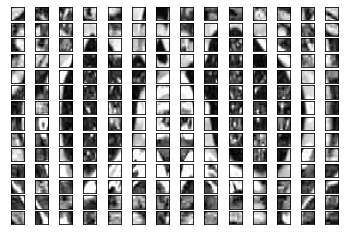

In [206]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(14, 14)
for i in range(14):
    for j in range(14):
        ax[i][j].imshow(mask_patch[i][j],cmap='gray')
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
# plt.tight_layout()
plt.show()

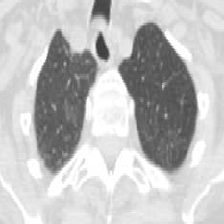

In [208]:
img

In [1]:
import random

In [7]:
random.uniform(1,1)

1.0

In [4]:
from torch import nn
import torch

In [2]:
layer1 = nn.Linear(768, 2)

In [8]:
x = torch.randn(2,196,768)

In [9]:
out = layer1(x)

In [10]:
out.shape

torch.Size([2, 196, 2])

In [1]:
from models.layers import PatchEmbedNaive

In [2]:
import torch
from torch import nn
from timm.models.layers import trunc_normal_

In [3]:
x = torch.randn(8, 1, 224,224)

In [8]:
import numpy as np
x = torch.randn(8,197,768)

In [9]:
layer1 = nn.Linear(768, 3)
out = layer1(x);out.shape

torch.Size([8, 197, 3])

In [13]:
x_mask = out[:, 1:]; x_mask.shape

torch.Size([8, 196, 3])

In [17]:
x_mask.max(1)[0].shape

torch.Size([8, 3])

In [5]:
layer1 = PatchEmbedNaive(
    img_size=224,
    patch_size=16,
    in_chans=1,
    embed_dim=768
)

In [25]:
out = layer1(x)

In [18]:
out = out.flatten(2).transpose(1,2)

In [5]:
cls_token = nn.Parameter(torch.zeros(1,1,768))


In [10]:
cls_tokens = cls_token.expand(8, -1, -1)

In [11]:
cls_tokens.shape

torch.Size([8, 1, 768])

In [19]:
x = torch.cat((cls_tokens, out), dim=1)

In [20]:
x.shape

torch.Size([8, 197, 768])

In [22]:
import numpy as np

lam = np.random.beta(0.5, 0.5)

In [26]:
out.shape

torch.Size([8, 768, 14, 14])

In [27]:
patch_h, patch_w = 14, 14

In [29]:
out.size()

torch.Size([8, 768, 14, 14])

In [28]:
def rand_bbox(size, lam):
    W = size[2]
    H = size[3]
    cut_rat = np.sqrt(1. - lam)
    cut_w = np.int(W * cut_rat)
    cut_h = np.int(H * cut_rat)

    # uniform
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2

In [37]:
bbx1, bby1, bbx2, bby2 = rand_bbox(out.size(), 0.3)

/tmp/ipykernel_372/2283934409.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cut_w = np.int(W * cut_rat)
/tmp/ipykernel_372/2283934409.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

In [39]:
rand_bbox(out.size(), 0.3)

/tmp/ipykernel_372/2283934409.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cut_w = np.int(W * cut_rat)
/tmp/ipykernel_372/2283934409.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

(0, 7, 8, 14)

In [41]:
x = torch.rand

In [ ]:
temp_x[:, :, bbx1:bbx2, bby1:bby2] = out.flip(0)[:, :, bbx1:bbx2, bby1:bby2]

In [1]:
from timm.models import create_model
import models
import torch

In [13]:
model = create_model(
    'lsvit',
    in_chans=1,
    num_classes=3,
    mix_token=False,     
)
model.mix_token=True

In [17]:
out[1].shape

torch.Size([2, 196, 3])

In [14]:
x = torch.randn(2, 1, 224, 224)
out = model(x)
out[2]

(4, 0, 14, 6)

In [16]:
out[0].shape

torch.Size([2, 3])

In [7]:
model.eval()

LS_ViT(
  (patch_embed): PatchEmbed4_2(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (proj): Conv2d(64, 384, kernel_size=(8, 8), stride=(8, 8))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0): Block(
      (norm1): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=384, out_features=1152, bias=False)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Li

In [8]:
model.training

False

In [ ]:
x = torch.nn